In [1]:
import numpy as np # linear algebra
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df_mushroom = pd.read_csv('mushroom.csv')
df_mushroom.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [3]:
df_mushroom.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [4]:
from sklearn.preprocessing import LabelEncoder
df_mushroom = df_mushroom.apply(LabelEncoder().fit_transform)

In [5]:
df_mushroom.head()

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0         889          4            2          7        0     1   
1         786          4            0          6        0     1   
2         246          3            1          5        1     4   
3         221          0            2          4        1     3   
4         630          3            3          8        1     5   

   gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                1             2          0           7  ...          0   
1                3             1          1           3  ...          1   
2                1             1          0           8  ...          1   
3                3             0          0           6  ...          0   
4                2             1          1           6  ...          1   

   veil_color  ring_number  ring_type  spore_print_color  population  habitat  \
0           0            2          6                  3           1        5   
1           0            2          6                  1           2        5   
2           3            2          6                  6           0        5   
3           3            2          0                  4           1        0   
4           2            0          4                  8           1        4   

   class  stalk_height  cap_diameter  
0      1           916           190  
1      0           128           750  
2      1           537           281  
3      1           234           829  
4      1           895           484  

[5 rows x 26 columns]

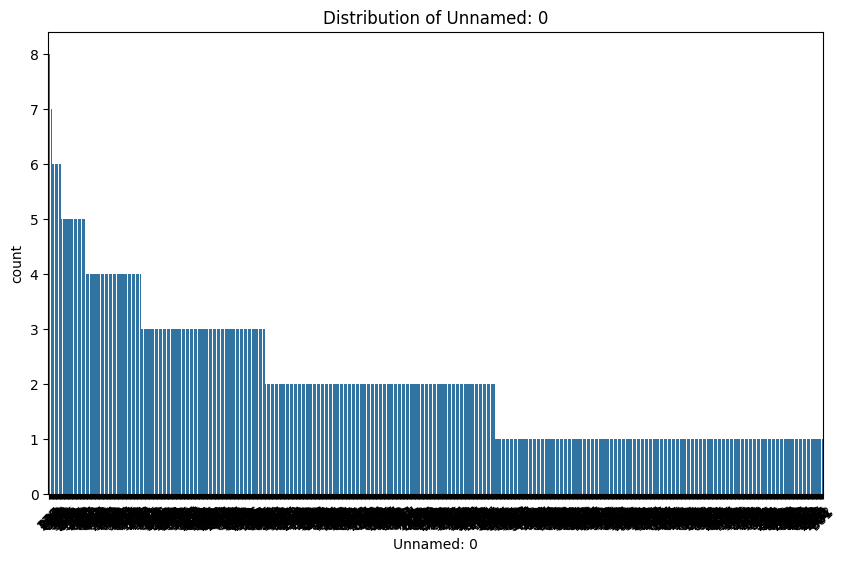

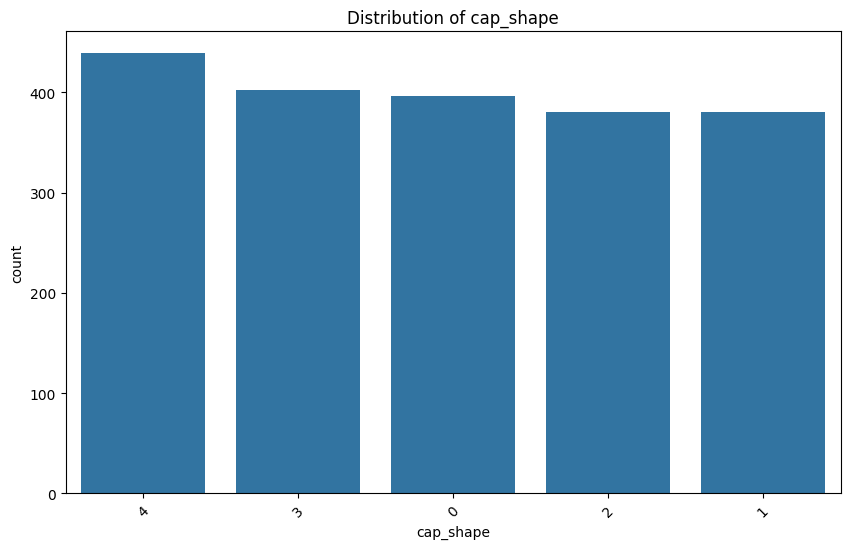

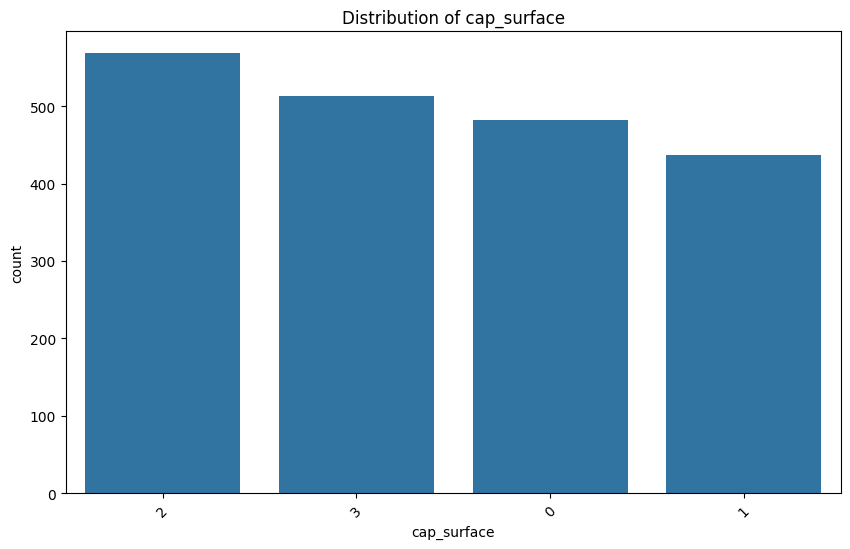

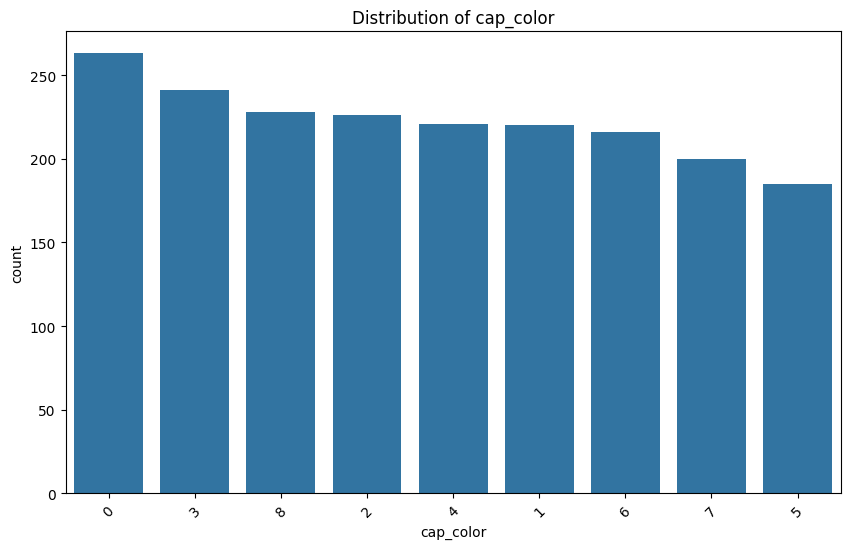

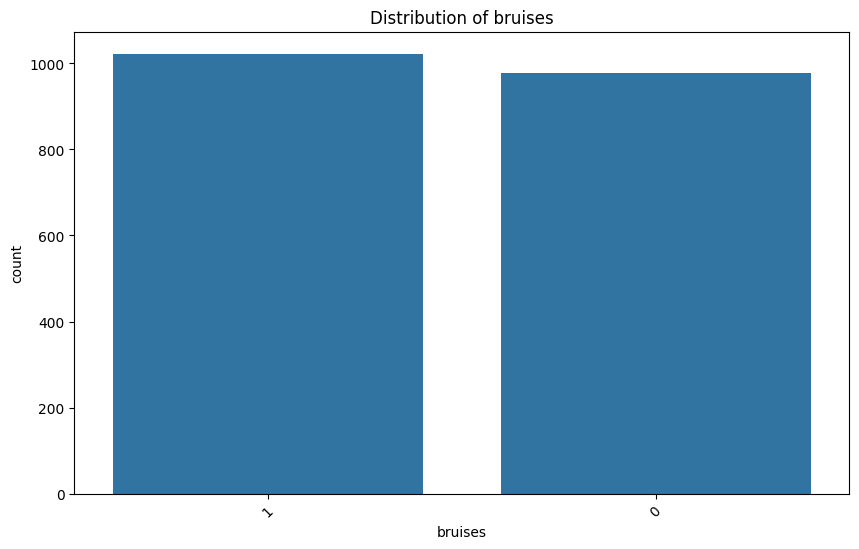

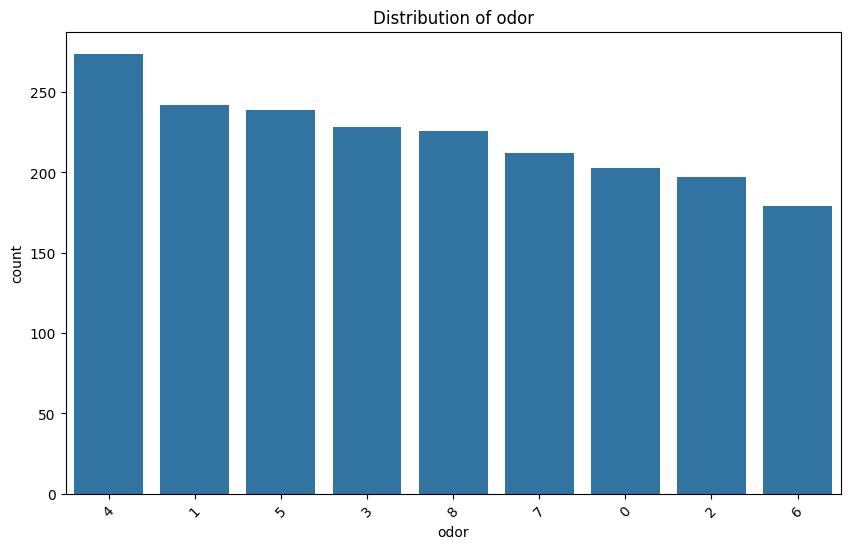

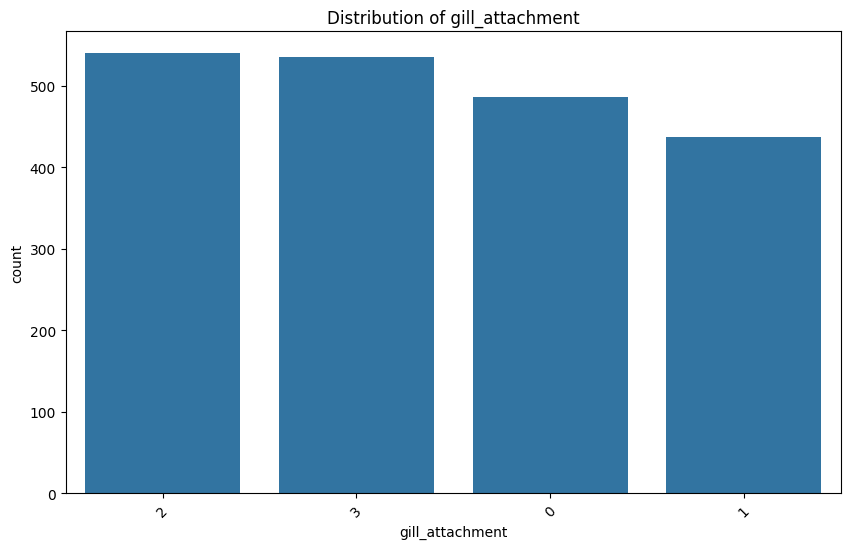

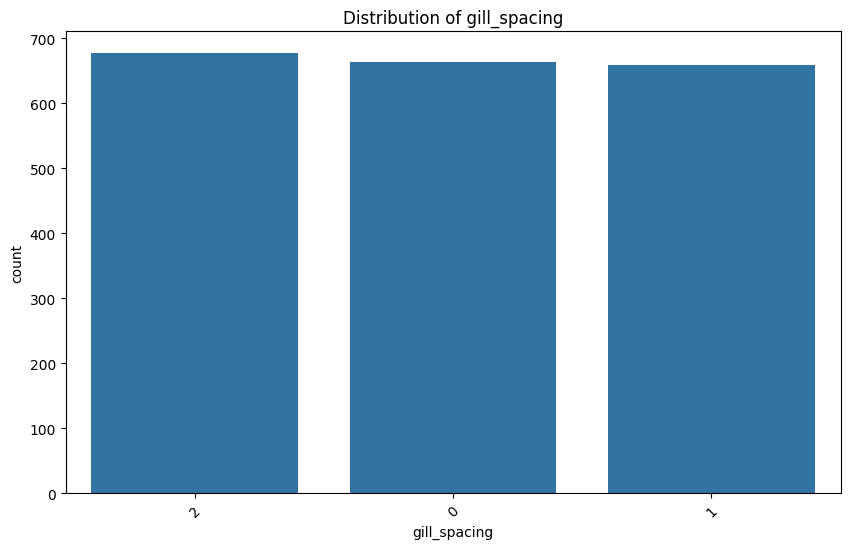

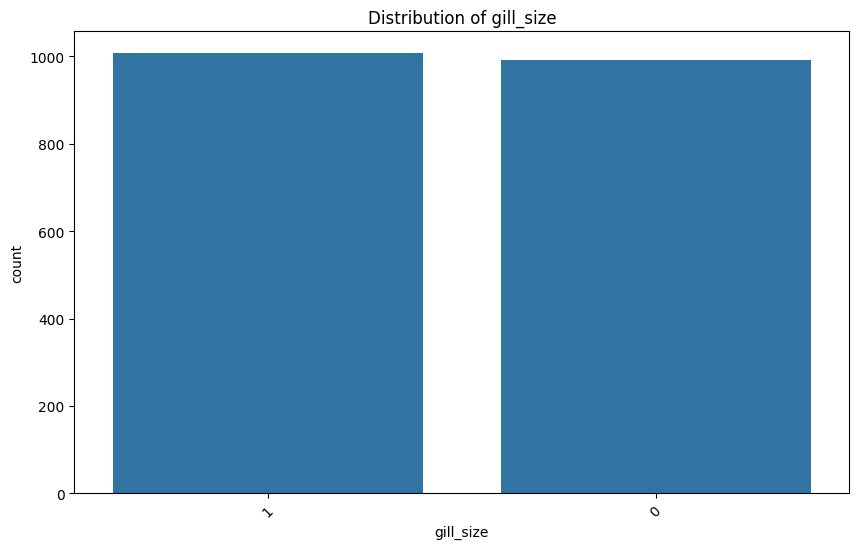

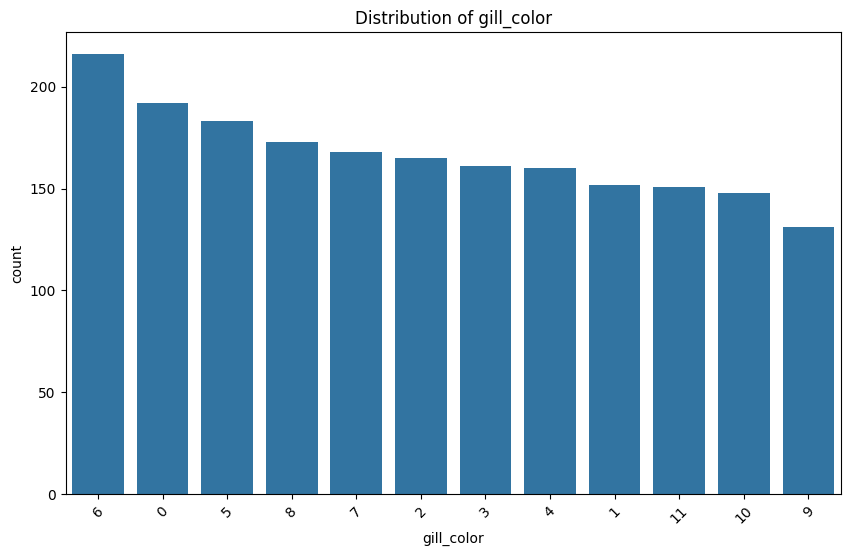

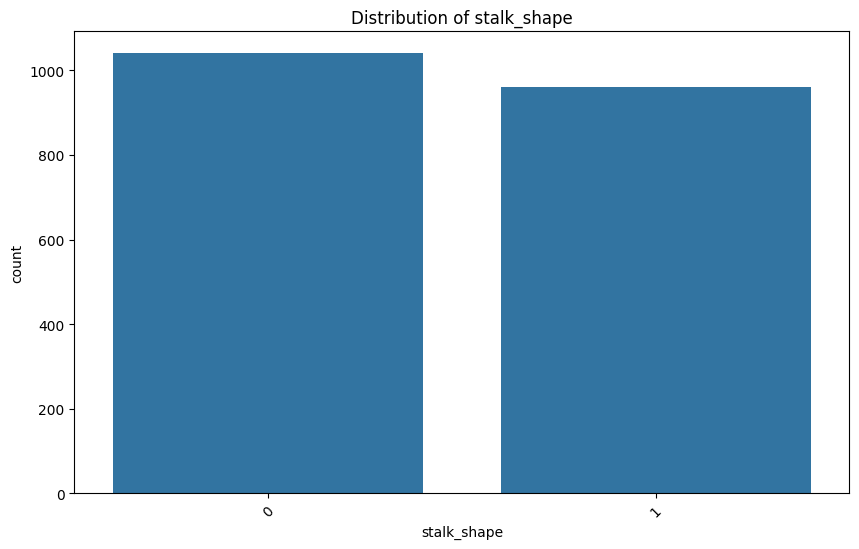

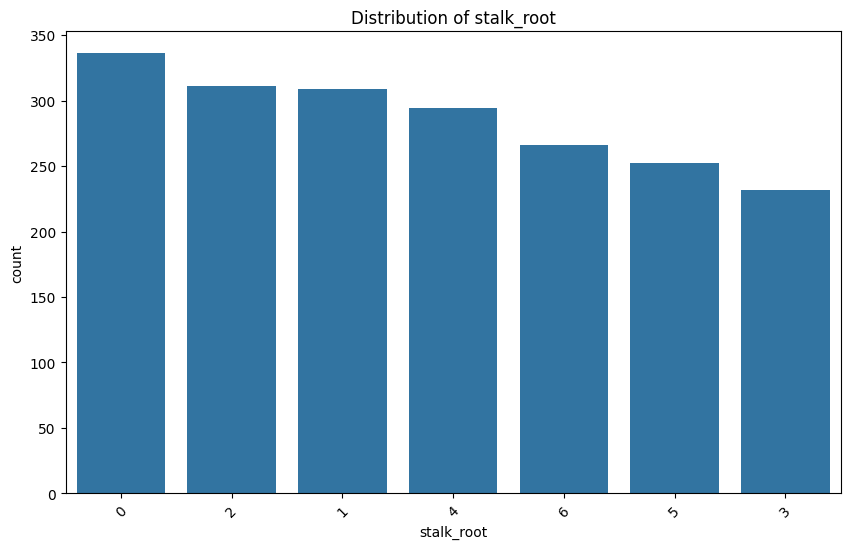

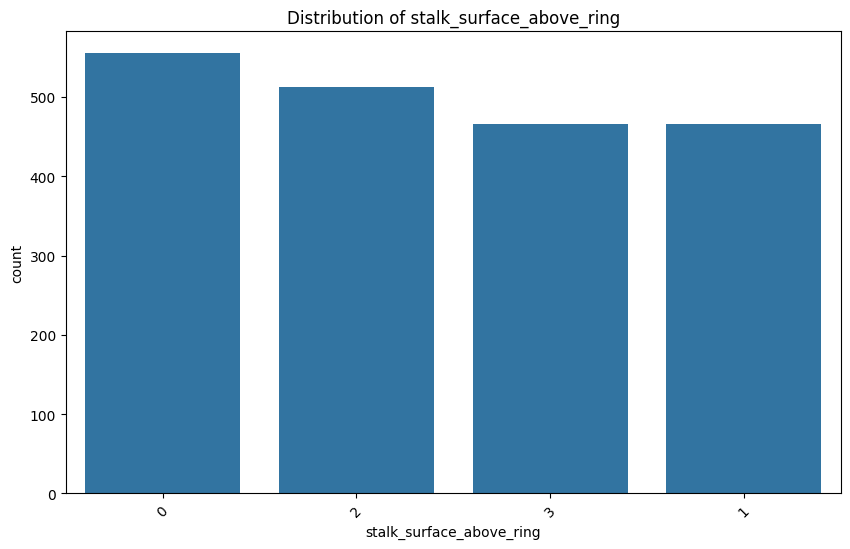

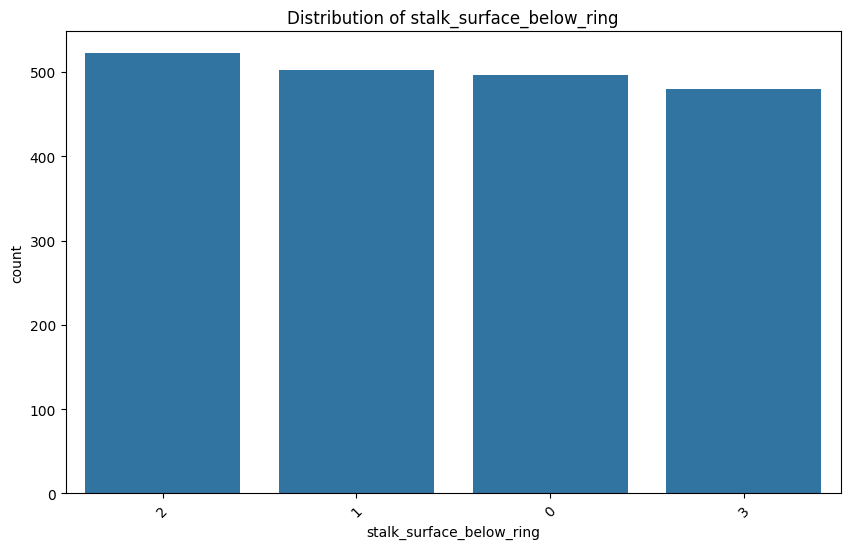

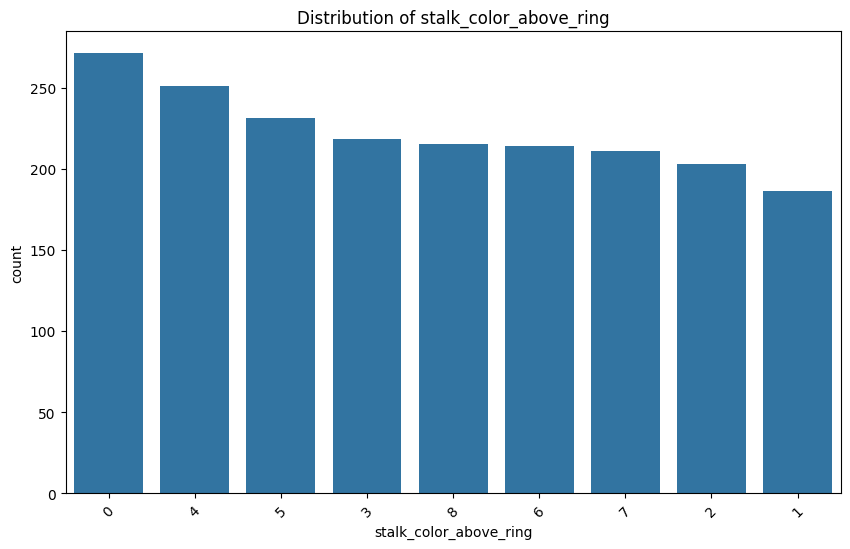

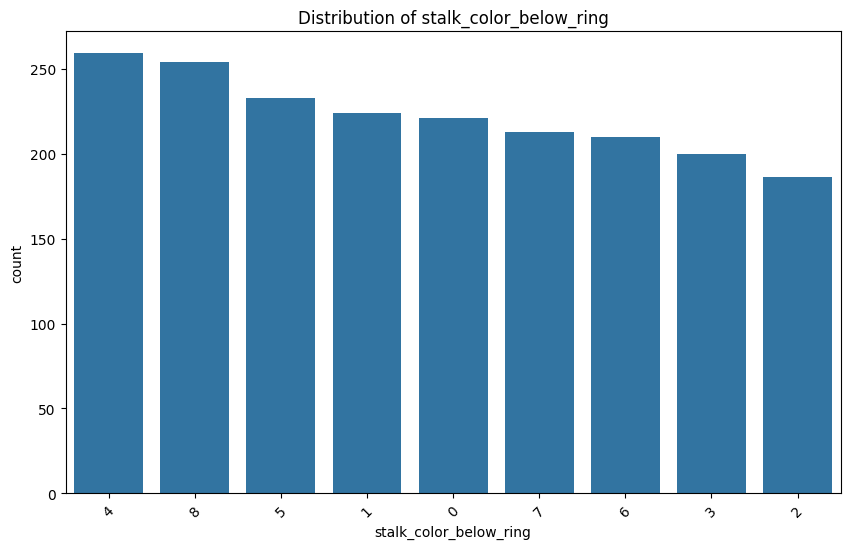

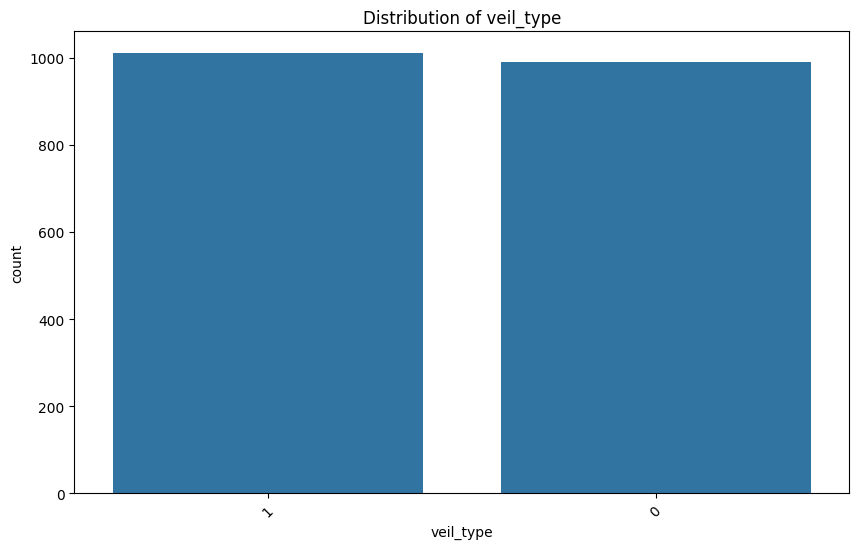

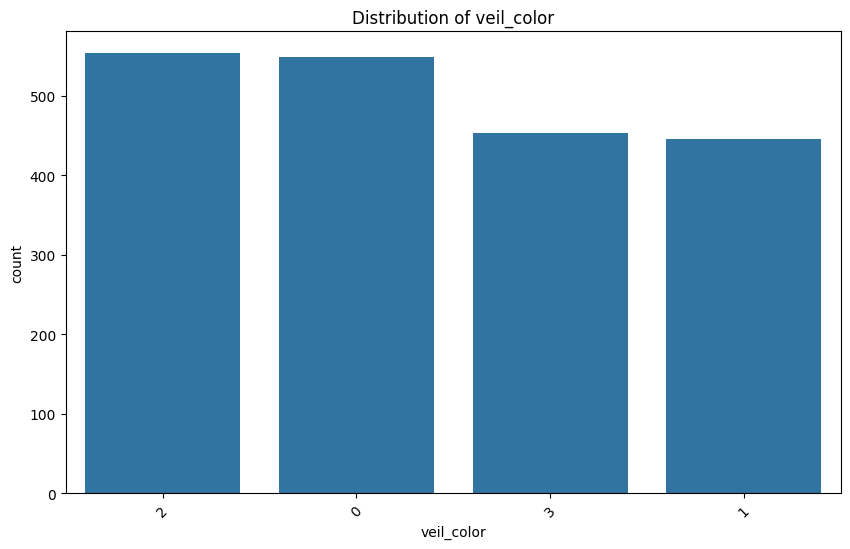

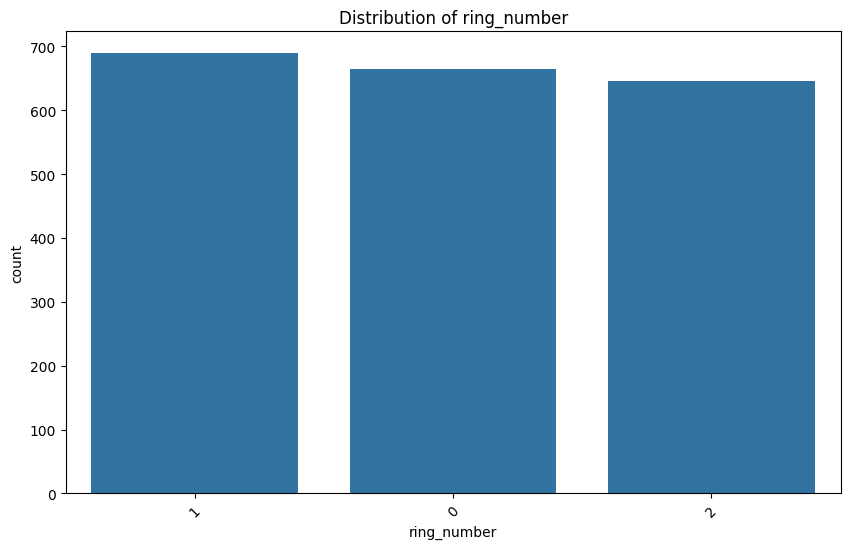

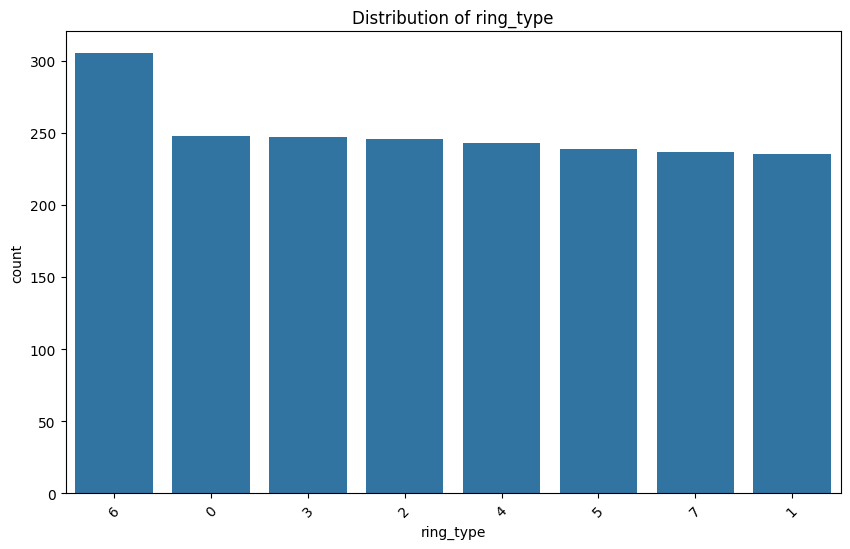

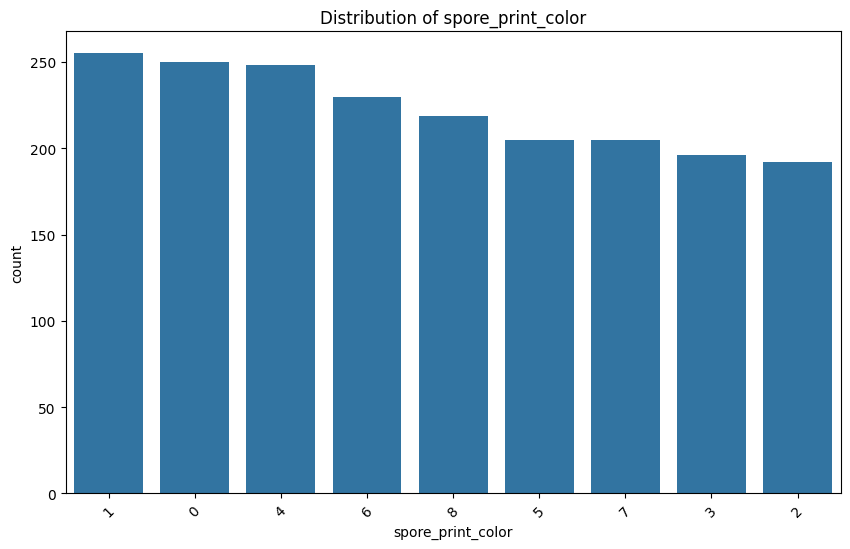

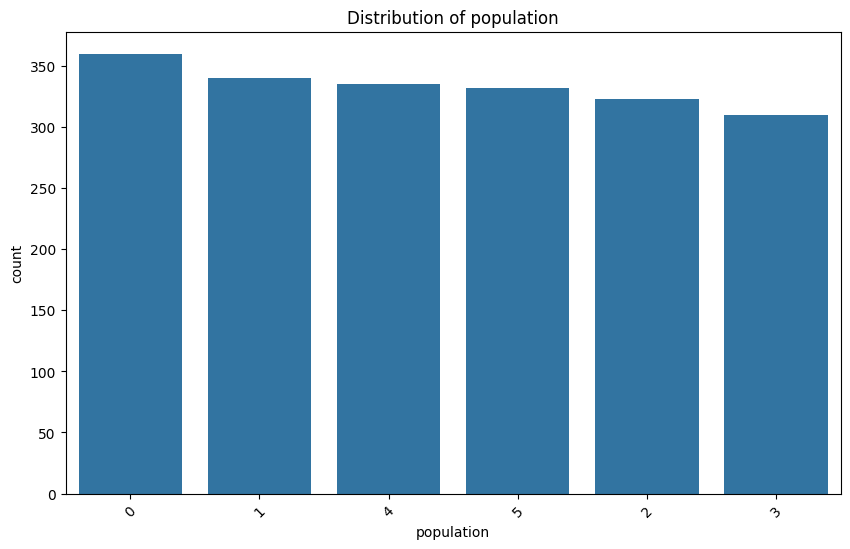

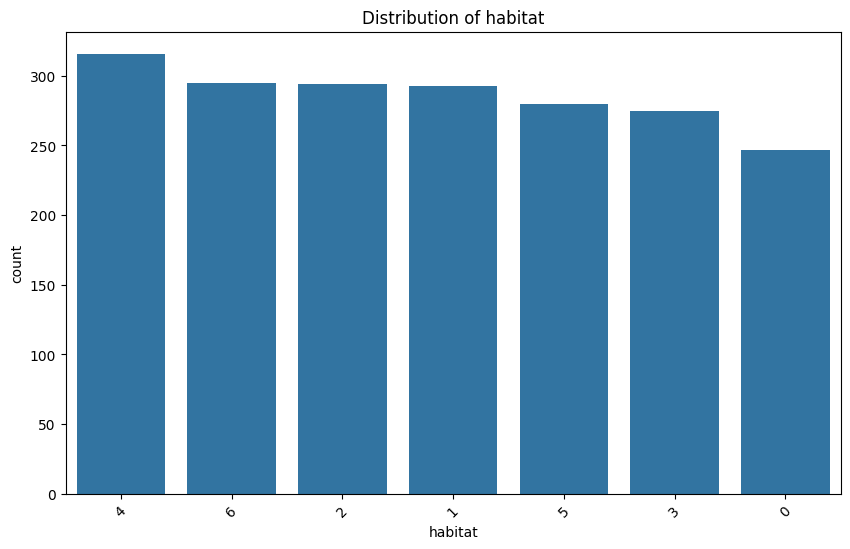

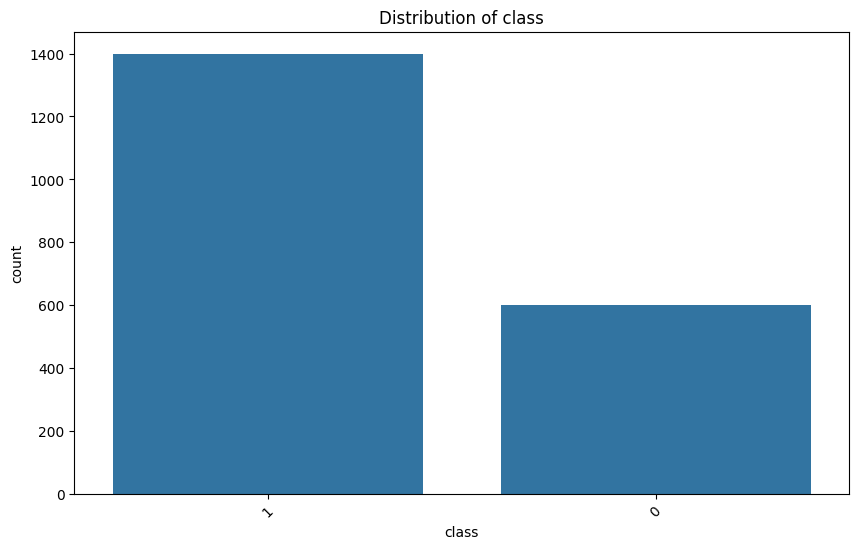

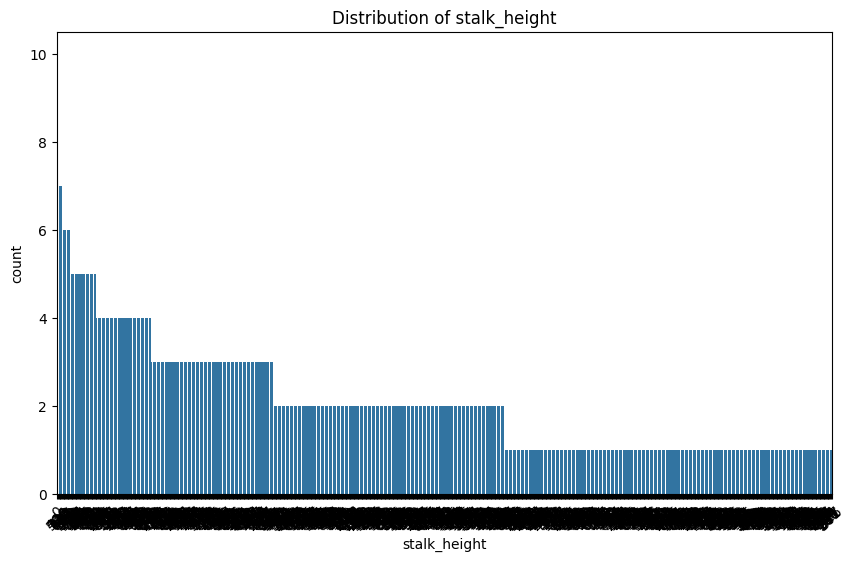

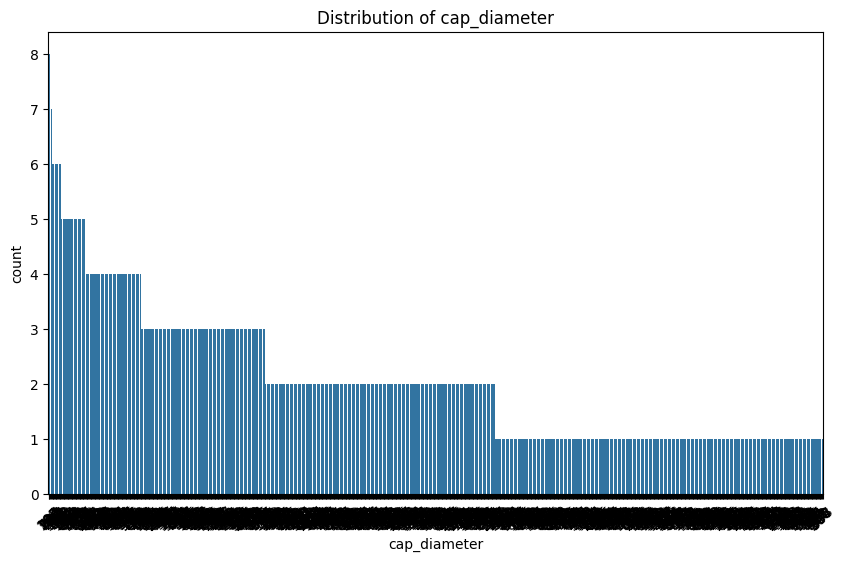

In [6]:
for column in df_mushroom.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_mushroom, x=column, order=df_mushroom[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

In [7]:
X = df_mushroom.iloc[:,1:]
y = df_mushroom.iloc[:, 0]

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print("\nTraining and testing set sizes:")
print(f"X_train: {x_train.shape}, X_test: {x_test.shape}")


Training and testing set sizes:
X_train: (1400, 25), X_test: (600, 25)


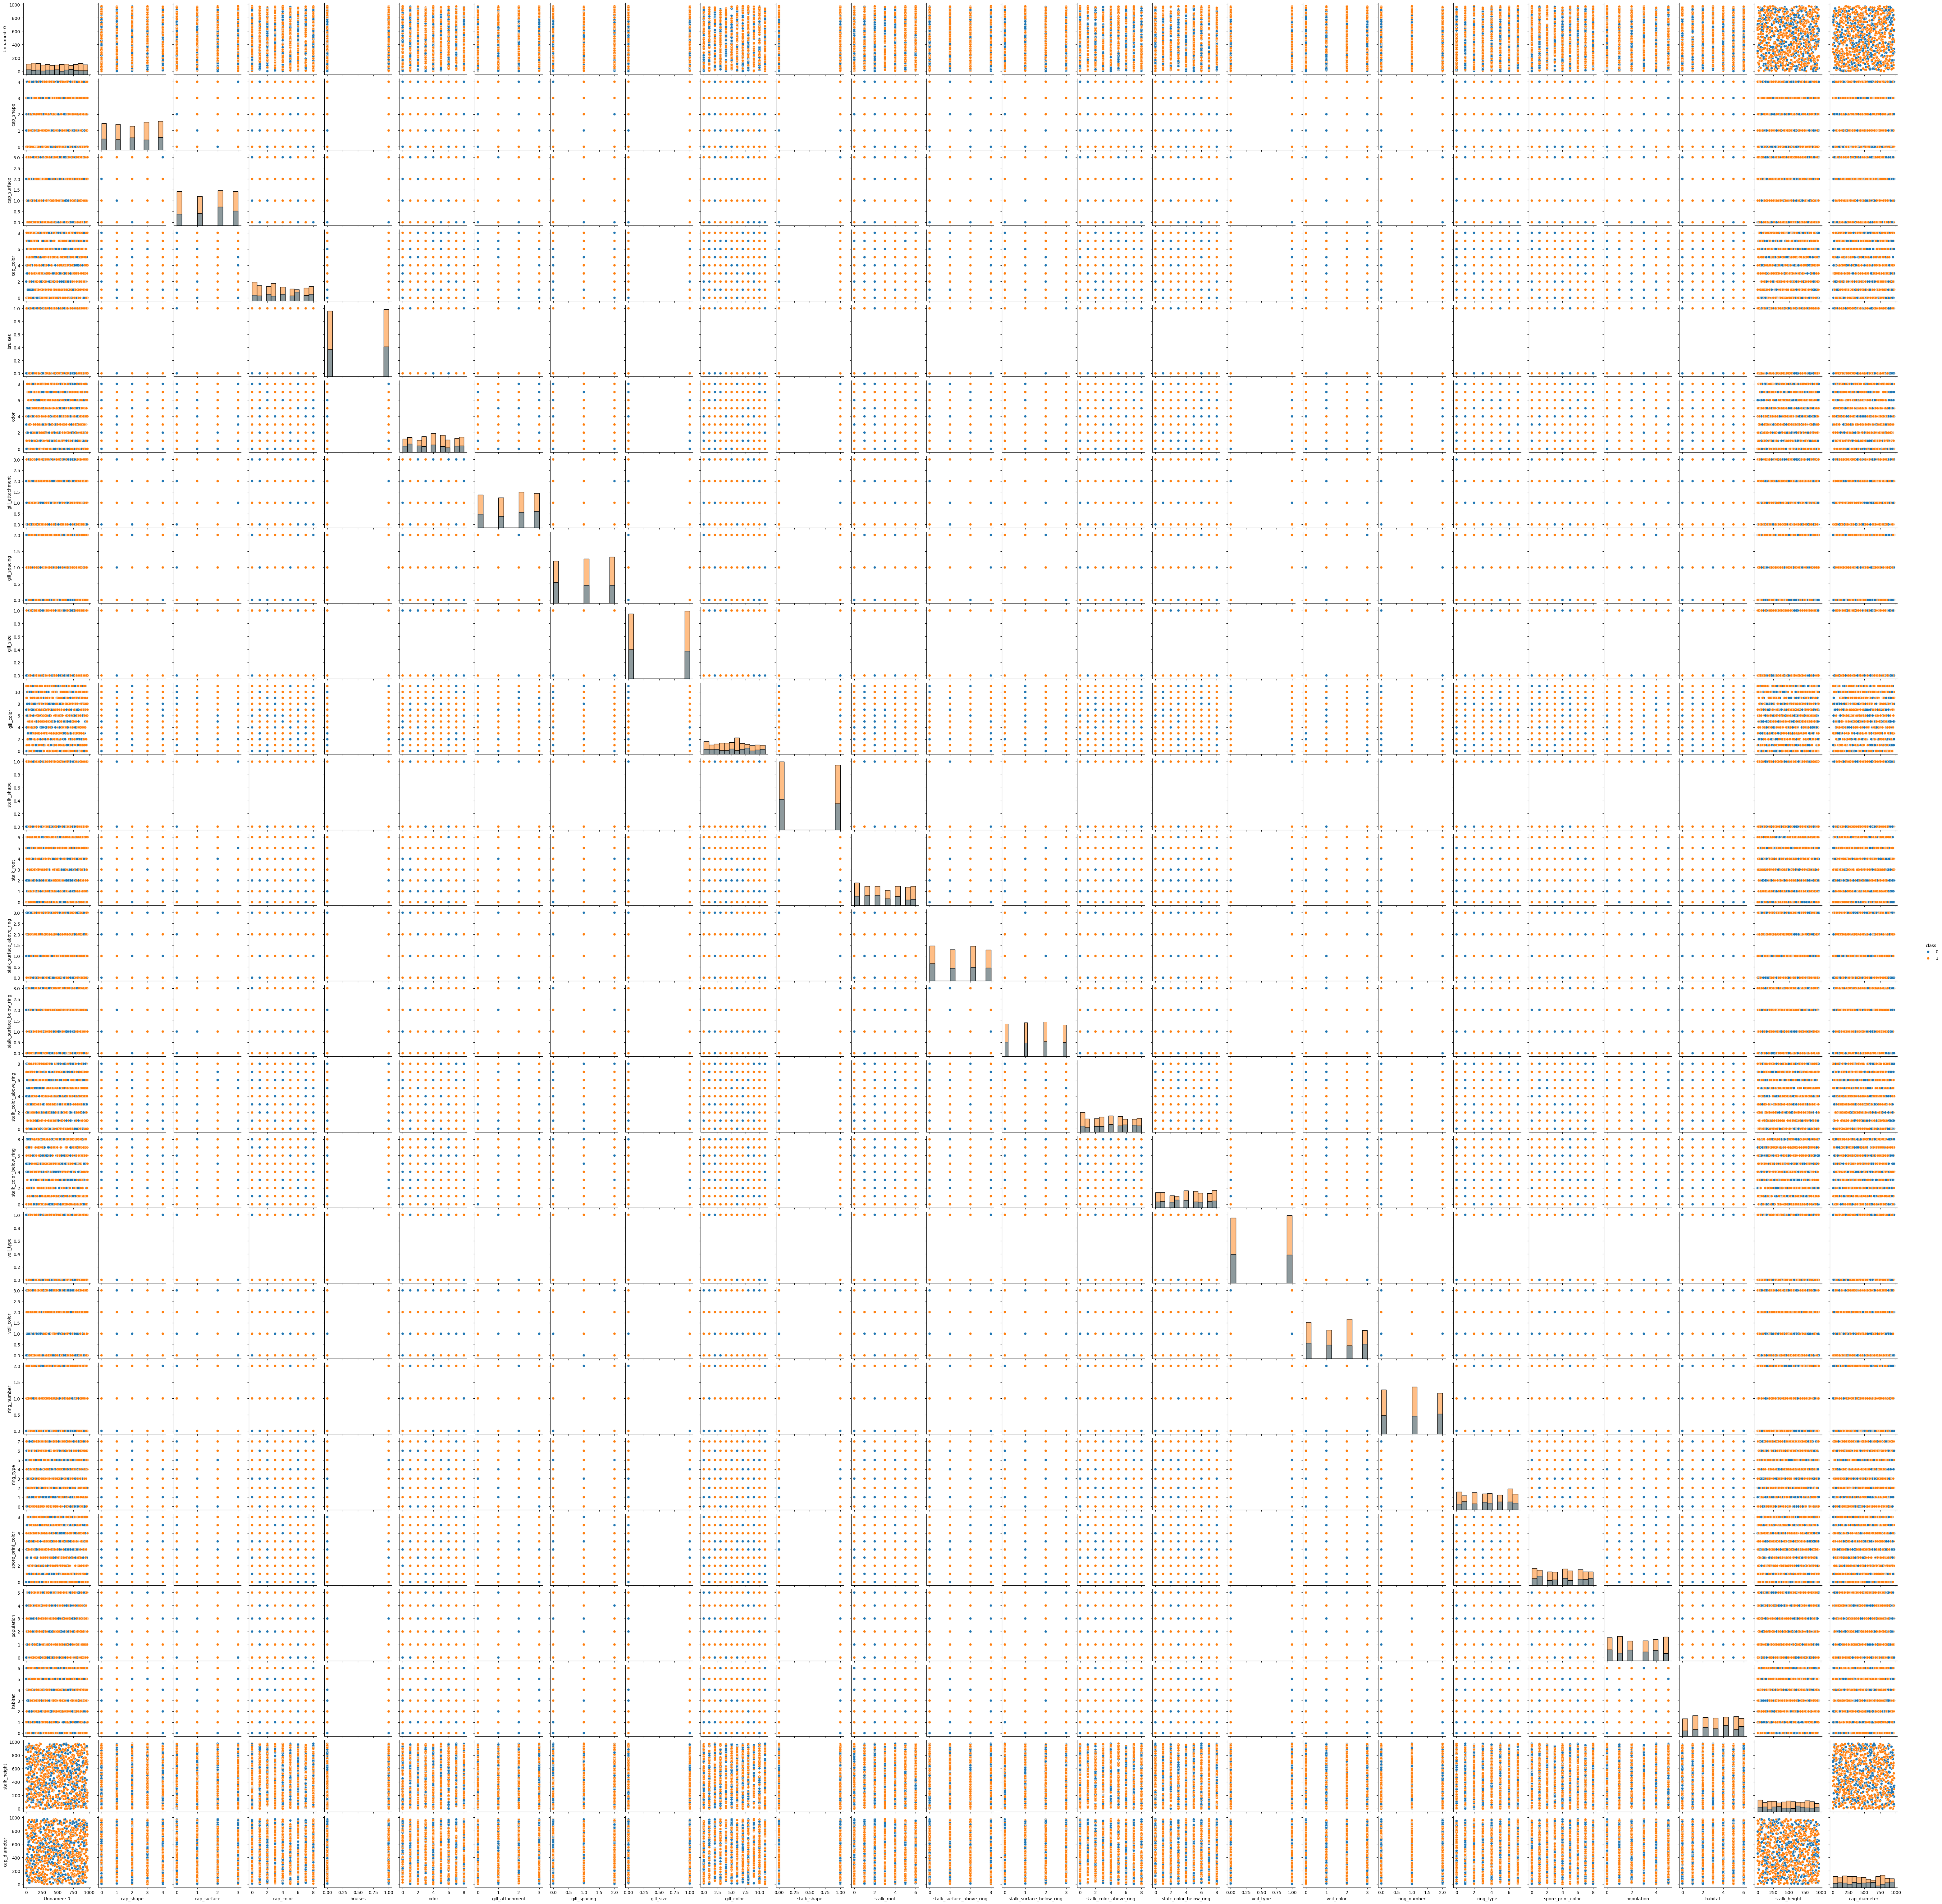

C:\Users\dhivya.dharani\AppData\Local\Temp\ipykernel_24044\4199299464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


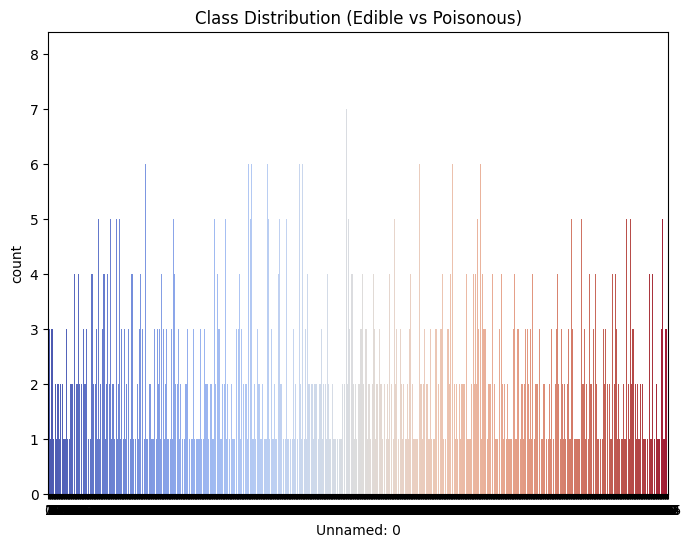

In [9]:
# Pairplot to visualize feature relationships
sns.pairplot(df_mushroom, hue='class', diag_kind='hist')
plt.show()

# Visualizing class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette='coolwarm')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

In [10]:
from sklearn.svm import SVC
svc_model = SVC(C=1, gamma='auto')
svc_model.fit(X=x_train, y=y_train)

SVC(C=1, gamma='auto')

In [11]:
y_pred = svc_model.predict(x_test)

In [12]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00         1
          24       0.00    

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

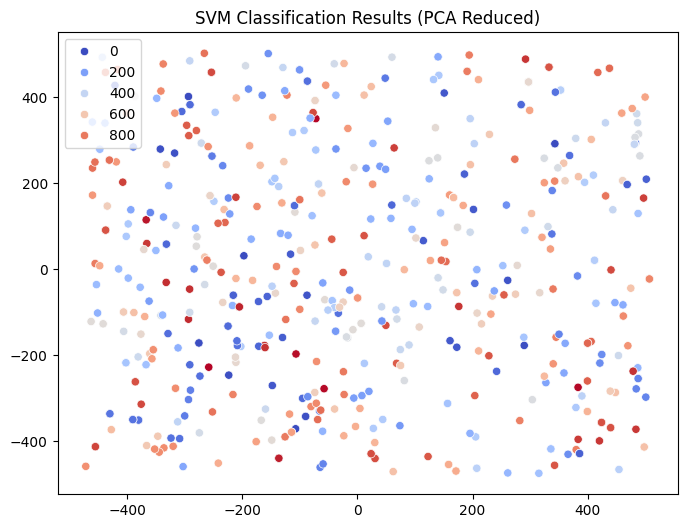

In [14]:
# Visualize predictions (PCA for dimensionality reduction)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(x_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm')
plt.title("SVM Classification Results (PCA Reduced)")
plt.show()


In [15]:
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [16]:
# Evaluate the best model
best_y_pred = best_model.predict(x_test)
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_y_pred))


Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00   

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

In [17]:
# Compare kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"\nKernel: {kernel}")
    print(classification_report(y_test, y_pred))


Kernel: linear
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          22       1.00      1.00      1.00         1
          2

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w


Kernel: rbf
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          47  

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w


Kernel: poly
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          47 

c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dhivya.dharani\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _w

Effectiveness in High-Dimensional Data:

The Mushroom dataset likely contains many categorical features, which, after encoding, result in a high-dimensional feature space.

SVMs are well-suited for such scenarios due to their ability to handle high-dimensional data efficiently and avoid overfitting.

Clear Class Boundaries:

If the EDA shows that features have distinct patterns for edible and poisonous mushrooms, SVM can create a robust decision boundary using its kernel functions.

Flexibility via Kernels:

The use of different kernel types (e.g., linear, RBF, polynomial) allows SVMs to model non-linear relationships between features and the target class.

Good Generalization:

SVM tends to generalize well to unseen data, especially when the dataset is balanced (as checked during class distribution visualization).


Weaknesses of SVM

Computationally Intensive:

The Mushroom dataset, if large, could lead to high computational cost for SVM, especially during hyperparameter tuning (e.g., grid search for kernel and regularization parameters).

Sensitivity to Imbalanced Data:

If the dataset is imbalanced (e.g., more edible mushrooms than poisonous ones), SVM might favor the majority class. This can be mitigated by techniques like class weighting (class_weight='balanced').

Feature Scaling Dependency:

SVMs are sensitive to feature scaling. If the categorical features (post-encoding) have varying scales, it can negatively impact model performance. Proper scaling (e.g., StandardScaler) is crucial.



Practical Implications of SVM in Real-World Classification Tasks

Support Vector Machines (SVMs) are widely used in various real-world classification tasks due to their robust mathematical foundation, ability to handle high-dimensional data, and flexibility through kernel functions. Below is a discussion of their practical applications and implications:

1. Applications Across Domains :
Medical Diagnosis,Fraud Detection,Image and Object Recognition,Text and Sentiment Classification,Bioinformatics

2. Strengths and Practical Benefits
Effective for High-Dimensional Data,Generalization Capability,Flexibility with Non-Linearity,Robustness to Outliers,Applicability to Small Datasets

3.  Challenges and Limitations in Practice:
Computational Cost,Difficulty with Imbalanced Data,Sensitive to Feature Scaling,Hyperparameter Tuning,Lack of Interpretability

Conclusion
SVMs are a powerful tool for real-world classification tasks, offering flexibility, reliability, and high performance in a variety of domains. However, practical implementation requires addressing challenges like computational complexity and interpretability to maximize their impact.